In [8]:
#using new dataset
import pandas as pd
import os
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    #plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
PATH = "../data/CUB_200_2011"
labels = pd.read_csv(os.path.join(PATH, "image_class_labels.txt"), sep=" ", header=None)
labels.columns = ["img_id", "label"]
labels.head(2)
labels.describe()

train_test = pd.read_csv(os.path.join(PATH, "train_test_split.txt"), sep=" ", header=None)
train_test.columns = ["img_id", "is_training_img"]
train_test.head(2)
images = pd.read_csv(os.path.join(PATH, "images.txt"), sep=" ", header=None)
images.columns = ["img_id", "filepath"]
images.head(2)
classes = pd.read_csv(os.path.join(PATH, "classes.txt"), sep=" ", header=None)
classes.columns = ["label", "category"]
classes.head(10)

df = images.merge(labels, on="img_id")
df = df.merge(train_test, on="img_id")
catagories = classes.category.tolist()
catagories[:10]
# print("catagories", catagories)
df["category"] = df.label.map(lambda x: catagories[x-1])

training_DF = df[df.is_training_img == 1]
testing_DF = df[df.is_training_img == 0]
print(training_DF.head(10))

#create TF generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=training_DF,
    directory="../data/CUB_200_2011/images",
    x_col="filepath",
    y_col="category",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224,224))

test_generator=test_datagen.flow_from_dataframe(
    dataframe=testing_DF,
    directory="../data/CUB_200_2011/images",
    x_col="filepath",
    y_col="category",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224,224))

    img_id                                           filepath  label  \
1        2  001.Black_footed_Albatross/Black_Footed_Albatr...      1   
3        4  001.Black_footed_Albatross/Black_Footed_Albatr...      1   
4        5  001.Black_footed_Albatross/Black_Footed_Albatr...      1   
6        7  001.Black_footed_Albatross/Black_Footed_Albatr...      1   
7        8  001.Black_footed_Albatross/Black_Footed_Albatr...      1   
8        9  001.Black_footed_Albatross/Black_Footed_Albatr...      1   
10      11  001.Black_footed_Albatross/Black_Footed_Albatr...      1   
14      15  001.Black_footed_Albatross/Black_Footed_Albatr...      1   
17      18  001.Black_footed_Albatross/Black_Footed_Albatr...      1   
19      20  001.Black_footed_Albatross/Black_Footed_Albatr...      1   

    is_training_img                    category  
1                 1  001.Black_footed_Albatross  
3                 1  001.Black_footed_Albatross  
4                 1  001.Black_footed_Albatross  
6      

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/tmp/ipykernel_12629/3884747568.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator, steps_per_epoch=50, epochs=100, validation_data=test_generator, validation_steps=50, callbacks=[early])


50/50 [==============================] - 7s 115ms/step - loss: 9.9778 - accuracy: 0.0094 - val_loss: 5.3172 - val_accuracy: 0.0094
Epoch 2/100
50/50 [==============================] - 5s 108ms/step - loss: 5.3154 - accuracy: 0.0127 - val_loss: 5.2020 - val_accuracy: 0.0125
Epoch 3/100
50/50 [==============================] - 5s 106ms/step - loss: 5.0161 - accuracy: 0.0325 - val_loss: 4.9980 - val_accuracy: 0.0288
Epoch 4/100
50/50 [==============================] - 5s 107ms/step - loss: 4.6967 - accuracy: 0.0631 - val_loss: 5.2770 - val_accuracy: 0.0269
Epoch 5/100
50/50 [==============================] - 5s 105ms/step - loss: 4.3748 - accuracy: 0.0819 - val_loss: 4.6995 - val_accuracy: 0.0606
Epoch 6/100
50/50 [==============================] - 5s 105ms/step - loss: 4.0179 - accuracy: 0.1437 - val_loss: 4.7246 - val_accuracy: 0.0688
Epoch 7/100
50/50 [==============================] - 5s 106ms/step - loss: 3.7351 - accuracy: 0.1952 - val_loss: 4.5463 - val_accuracy: 0.0644
Epoch 8/100

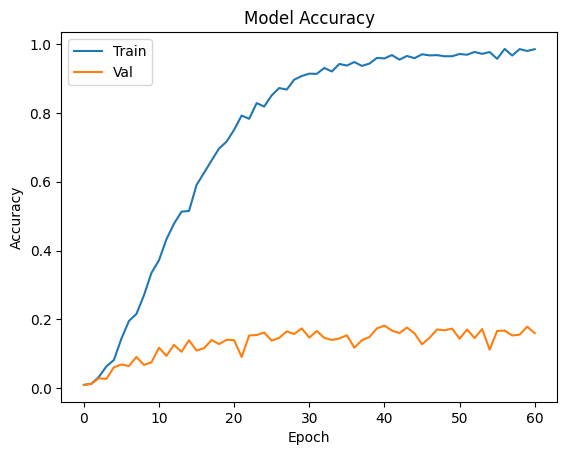

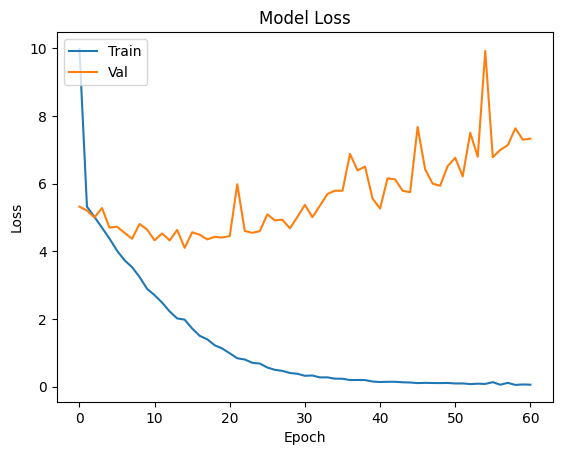

/home/joe/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 3s 51ms/step - loss: 7.3311 - accuracy: 0.1706


[7.33110237121582, 0.1706250011920929]

In [9]:
#create tf vgg16 model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16.trainable = False
x = Flatten()(vgg16.output)
x = Dense(1024, activation='relu')(x)
x = Dense(200, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
model.summary()

#train model
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
history = model.fit_generator(generator=train_generator, steps_per_epoch=50, epochs=100, validation_data=test_generator, validation_steps=50, callbacks=[early])
plot_accuracy_loss(history)
#save model
model.save("../models/vgg16_1.h5")
#test model
model = load_model("../models/vgg16_1.h5")
model.evaluate(test_generator, steps=50)


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

/tmp/ipykernel_12629/4190064616.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator, steps_per_epoch=50, epochs=100, validation_data=test_generator, validation_steps=50, callbacks=[early])


50/50 [==============================] - 7s 115ms/step - loss: 30.2507 - accuracy: 0.0044 - val_loss: 5.2992 - val_accuracy: 0.0037
Epoch 2/100
50/50 [==============================] - 5s 102ms/step - loss: 5.4407 - accuracy: 0.0069 - val_loss: 5.2985 - val_accuracy: 0.0019
Epoch 3/100
50/50 [==============================] - 5s 100ms/step - loss: 5.4799 - accuracy: 0.0056 - val_loss: 5.2984 - val_accuracy: 0.0012
Epoch 4/100
50/50 [==============================] - 5s 102ms/step - loss: 5.3113 - accuracy: 0.0044 - val_loss: 5.2984 - val_accuracy: 0.0075
Epoch 5/100
50/50 [==============================] - 5s 104ms/step - loss: 5.3553 - accuracy: 0.0050 - val_loss: 5.2988 - val_accuracy: 0.0037
Epoch 6/100
50/50 [==============================] - 5s 108ms/step - loss: 5.3172 - accuracy: 0.0050 - val_loss: 5.2988 - val_accuracy: 0.0050
Epoch 7/100
50/50 [==============================] - 5s 108ms/step - loss: 5.3162 - accuracy: 0.0038 - val_loss: 5.2989 - val_accuracy: 0.0044
Epoch 8/10

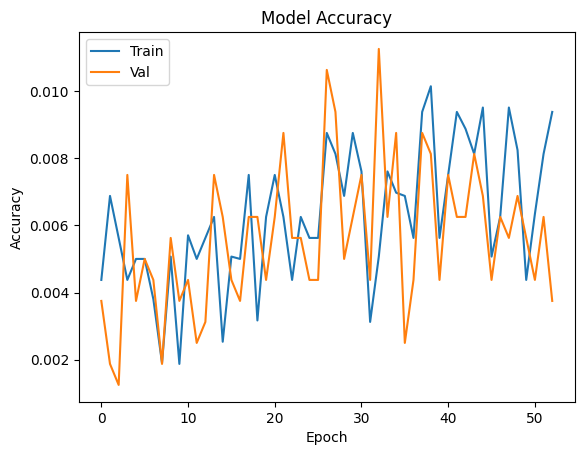

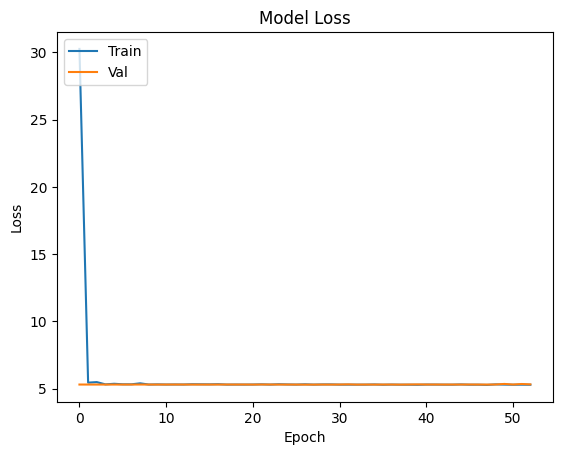

50/50 [==============================] - 3s 51ms/step - loss: 5.3112 - accuracy: 0.0063


[5.311244010925293, 0.0062500000931322575]

In [10]:
#resnet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50.trainable = False
x = Flatten()(resnet50.output)
x = Dense(1024, activation='relu')(x)
x = Dense(200, activation='softmax')(x)
model = Model(inputs=resnet50.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
model.summary()

#train model
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
history = model.fit_generator(generator=train_generator, steps_per_epoch=50, epochs=100, validation_data=test_generator, validation_steps=50, callbacks=[early])
plot_accuracy_loss(history)
#save model
model.save("../models/resnet50_1.h5")
#test model
model = load_model("../models/resnet50_1.h5")
model.evaluate(test_generator, steps=50)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_8[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

/tmp/ipykernel_12629/4277861111.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator, steps_per_epoch=50, epochs=100, validation_data=test_generator, validation_steps=50, callbacks=[early])


50/50 [==============================] - 8s 119ms/step - loss: 53.4702 - accuracy: 0.0184 - val_loss: 5.2583 - val_accuracy: 0.0356
Epoch 2/100
50/50 [==============================] - 5s 106ms/step - loss: 5.4355 - accuracy: 0.0413 - val_loss: 5.1360 - val_accuracy: 0.0419
Epoch 3/100
50/50 [==============================] - 5s 103ms/step - loss: 5.2858 - accuracy: 0.0577 - val_loss: 5.1077 - val_accuracy: 0.0656
Epoch 4/100
50/50 [==============================] - 5s 104ms/step - loss: 4.8314 - accuracy: 0.0862 - val_loss: 4.4957 - val_accuracy: 0.1025
Epoch 5/100
50/50 [==============================] - 5s 101ms/step - loss: 4.3376 - accuracy: 0.1369 - val_loss: 4.6124 - val_accuracy: 0.1294
Epoch 6/100
50/50 [==============================] - 5s 106ms/step - loss: 4.0474 - accuracy: 0.1660 - val_loss: 4.3151 - val_accuracy: 0.1112
Epoch 7/100
50/50 [==============================] - 5s 103ms/step - loss: 3.8492 - accuracy: 0.1825 - val_loss: 4.5223 - val_accuracy: 0.1550
Epoch 8/10

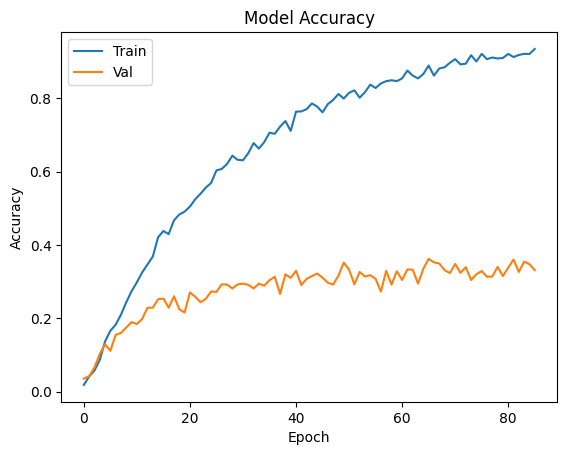

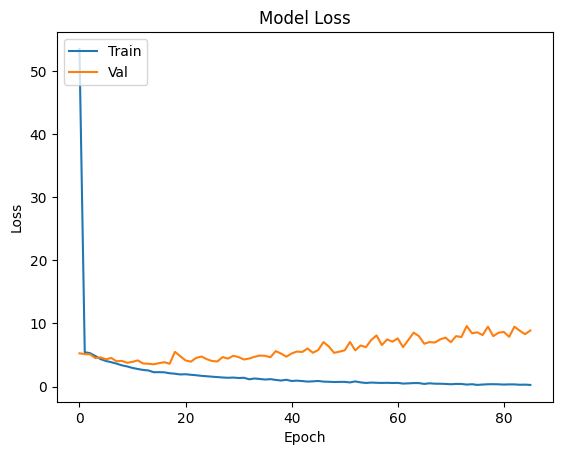

50/50 [==============================] - 3s 49ms/step - loss: 8.3868 - accuracy: 0.3319


[8.386791229248047, 0.3318749964237213]

In [11]:
#inceptionv3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inceptionv3.trainable = False
x = Flatten()(inceptionv3.output)
x = Dense(1024, activation='relu')(x)
x = Dense(200, activation='softmax')(x)
model = Model(inputs=inceptionv3.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
model.summary()

#train model
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
history = model.fit_generator(generator=train_generator, steps_per_epoch=50, epochs=100, validation_data=test_generator, validation_steps=50, callbacks=[early])
plot_accuracy_loss(history)
#save model
model.save("../models/inceptionv3_1.h5")
#test model
model = load_model("../models/inceptionv3_1.h5")
model.evaluate(test_generator, steps=50)